## Supervised Learning Models - Wine Quality Project

Data: [red and white wine datasets](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality)

Goal: using different regression models to classify wine types.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Add a new column "winetype", value 1 indicating red wine. 
red = pd.read_csv("winequality-red.csv", sep=';')
red['winetype'] = 1
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
# Add a new column "winetype", value 0 indicating white wine. 
white = pd.read_csv("winequality-white.csv", sep=';')
white['winetype'] = 0
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [4]:
# Combine both datasets into a single dataframe - wine
wine = red.append(white)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
winetype                6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


Text(0.5, 1.0, 'Wine Type Distribustion')

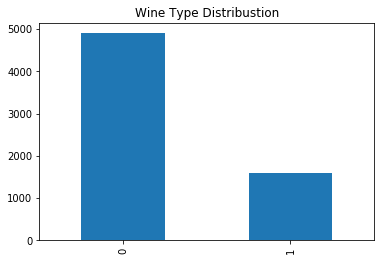

In [6]:
# Visualize the univariate distribution of the target feature and other explanatory variables.

# distribution of the target feature - winetype
wine['winetype'].value_counts().plot(kind='bar')
plt.title('Wine Type Distribustion')

Text(0.5, 1.0, 'Residual Sugar Distribustion')

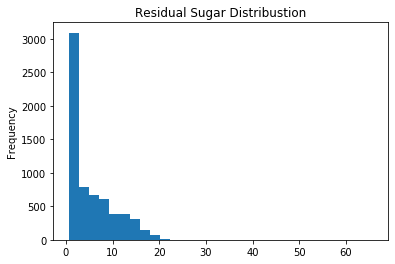

In [7]:
# distribution of residual sugar
wine['residual sugar'].plot.hist(bins=30)
plt.title('Residual Sugar Distribustion')

Text(0.5, 1.0, 'Density Distribustion')

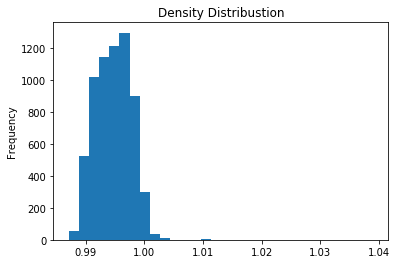

In [8]:
# distribution of free sulfur dioxide
wine['density'].plot.hist(bins=30)
plt.title('Density Distribustion')

Text(0.5, 1.0, 'Total Sulfur Dioxide Distribustion')

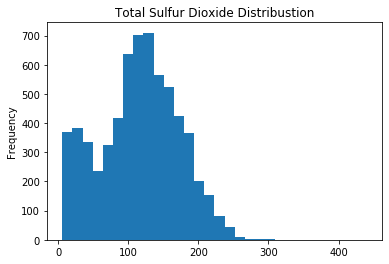

In [9]:
# distribution of total sulfur dioxide
wine['total sulfur dioxide'].plot.hist(bins=30)
plt.title('Total Sulfur Dioxide Distribustion')

In [10]:
# train test split
from sklearn.model_selection import train_test_split

X = wine.drop('winetype', axis=1)
y = wine['winetype']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
# Build models that evaluate the relationship. 

# Logistic Regression 
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(C=1e90,solver='lbfgs')
lg.fit(X_train, y_train)
print("accuracy: {:.2f}".format(lg.score(X_test, y_test)))

accuracy: 0.98


/Users/fanyaweng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [12]:
# Penalized Logistic Regression
plg = LogisticRegression(penalty='l1',C=1e90,solver='liblinear')
plg.fit(X_train, y_train)
print("accuracy: {:.2f}".format(plg.score(X_test, y_test)))

accuracy: 0.99


In [13]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("accuracy: {:.2f}".format(knn.score(X_test, y_test)))

accuracy: 0.94


In [15]:
# Evaluate models using cross-validation.

#import cross validation function from sk learn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

# Set up function parameters for diff't cross validation strategies
skfold = StratifiedKFold()
kfold = KFold()

/Users/fanyaweng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:629: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
/Users/fanyaweng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:431: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


In [16]:
# Logistic Regression using cross-validation
print("cross-validation score: {:.2f}".format(np.mean(cross_val_score(
    LogisticRegression(C=1e90,tol=1,solver='lbfgs',max_iter=1000), X_train, y_train, cv=skfold))))
# set tol=1, solver='lbfgs', max_iter=1000 and cv=5 to silence warnings

cross-validation score: 0.99


In [17]:
# Penalized Logistic Regression using cross-validation
print("cross-validation score: {:.2f}".format(np.mean(cross_val_score(
    LogisticRegression(penalty='l1',C=1e90,solver='liblinear'), X_train, y_train, cv=skfold))))
# set tol=1, solver='liblinear', max_iter=1000 and cv=5 to silence warnings

cross-validation score: 0.99


In [18]:
# KNN using cross-validation
print("cross-validation score: {:.2f}".format(np.mean(cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=skfold))))
# set cv=5 to silence warnings

cross-validation score: 0.94


In [20]:
# Scaling the data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
wine_feature = pd.DataFrame(X_train_scaled, columns=wine.columns[:-1])
wine_feature.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.002113,0.332463,-0.001832,-0.764752,0.281466,0.191949,-1.000686,0.822497,1.522261,1.688735,-0.494218,-0.937018
1,2.798918,0.827735,0.759333,-0.702034,3.427613,-0.209956,-0.893306,1.174310,-0.291879,1.553514,0.259076,0.203415
2,0.856692,1.694462,-0.140226,-0.702034,0.845398,-1.128594,-1.179652,0.842411,1.146921,0.539357,-0.243120,0.203415
3,-0.541710,0.084826,-0.071029,0.991360,0.400189,1.569906,0.967948,0.749479,-0.229323,-0.271968,-0.912714,-0.937018
4,-1.085533,0.301508,-0.486210,-0.367537,-0.727675,0.421608,0.108908,-1.122433,-0.104210,0.674578,0.593874,0.203415


In [21]:
# Logistic Regression using scaled data
lg = LogisticRegression(C=1e90,solver='lbfgs')
lg.fit(X_train_scaled, y_train)
print("accuracy: {:.2f}".format(lg.score(X_test_scaled, y_test)))

# Compare to unscaled score of 0.98, scaling helps a little

accuracy: 0.99


In [22]:
# Penalized Logistic Regression using scaled data
plg = LogisticRegression(penalty='l1',C=1e90,solver='liblinear')
plg.fit(X_train_scaled, y_train)
print("accuracy: {:.2f}".format(plg.score(X_test_scaled, y_test)))

# Compare to unscaled score of 0.99, scaling does not help.

accuracy: 0.99


In [23]:
# KNN using scaled data
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
print("accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))

# Compare to unscaled score of 0.94, scaling does not help.

accuracy: 0.99


In [24]:
# Tune the parameters of the models using GridSearchCV. 

from sklearn.model_selection import GridSearchCV

In [25]:
# Tuning parameters for Logistic Regression Model
lg_params = {'C':[0.01,1,100,10000,1e90]} # 'tol':[0.0001, 0.01, 1, 10]   
# set tol=1, max_iter=1000, and cv=5 to silence warnings
lg_grid = GridSearchCV(LogisticRegression(solver='lbfgs', tol=1, max_iter=1000), param_grid=lg_params, cv=skfold) 
lg_grid.fit(X_train, y_train)
# extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.2f}".format(lg_grid.best_score_))
print("best parameters: {}".format(lg_grid.best_params_))
print("test-set score: {:.2f}".format(lg_grid.score(X_test, y_test)))

# Compare to 0.98, gridsearch has little improvement

best mean cross-validation score: 0.99
best parameters: {'C': 100}
test-set score: 0.99


In [26]:
# Tuning parameters for Penalized Logistic Regression Model
plg_params = {'C':[0.01,1,100,10000,1e90], 'tol':[0.0001, 0.01, 1, 10]} 
# set solver='liblinear' and cv=5 to silence the warning
plg_grid = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear'), param_grid=plg_params, cv=skfold) 
plg_grid.fit(X_train, y_train)
# extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.2f}".format(plg_grid.best_score_))
print("best parameters: {}".format(plg_grid.best_params_))
print("test-set score: {:.2f}".format(plg_grid.score(X_test, y_test)))

# Compare to 0.99, gridsearch has no improvement

best mean cross-validation score: 0.99
best parameters: {'C': 100, 'tol': 0.0001}
test-set score: 0.99


In [27]:
# Tuning parameters for KNN Model
knn_params = {'n_neighbors': np.arange(1, 15, 2)}
# set solver='liblinear' and cv=5 to silence the warning
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid=knn_params, cv=skfold) 
knn_grid.fit(X_train, y_train)
# extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.2f}".format(knn_grid.best_score_))
print("best parameters: {}".format(knn_grid.best_params_))
print("test-set score: {:.2f}".format(knn_grid.score(X_test, y_test)))

# Compare to 0.94, gridsearch has no improvement

best mean cross-validation score: 0.94
best parameters: {'n_neighbors': 9}
test-set score: 0.94


In [29]:
# Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling.

kfold = KFold(shuffle=True)

/Users/fanyaweng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:431: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


In [30]:
# GridSearchCV for Logistic Regression Model
lg_params = {'C':[0.01,1,100,10000,1e90]} # 'tol':[0.0001, 0.01, 1, 10]   
# set tol=1, max_iter=1000, and cv=5 to silence warnings
lg_grid = GridSearchCV(LogisticRegression(solver='lbfgs', tol=1, max_iter=1000), param_grid=lg_params, cv=kfold) 
lg_grid.fit(X_train, y_train)
# extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.2f}".format(lg_grid.best_score_))
print("best parameters: {}".format(lg_grid.best_params_))
print("test-set score: {:.2f}".format(lg_grid.score(X_test, y_test)))

# Changing to ‘kfold’ with shuffling, the best parameters changed from C=100 to C=1e+90

best mean cross-validation score: 0.99
best parameters: {'C': 1e+90}
test-set score: 0.99


/Users/fanyaweng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [31]:
# GridSearchCV for Penalized Logistic Regression Model
plg_params = {'C':[0.01,1,100,10000,1e90], 'tol':[0.0001, 0.01, 1, 10]} 
# set solver='liblinear' and cv=5 to silence the warning
plg_grid = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear'), param_grid=plg_params, cv=kfold) 
plg_grid.fit(X_train, y_train)
# extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.2f}".format(plg_grid.best_score_))
print("best parameters: {}".format(plg_grid.best_params_))
print("test-set score: {:.2f}".format(plg_grid.score(X_test, y_test)))

# Changing to ‘kfold’ with shuffling, the best parameters did not change

best mean cross-validation score: 0.99
best parameters: {'C': 100, 'tol': 0.0001}
test-set score: 0.99


In [32]:
# GridSearchCV for KNN Model
knn_params = {'n_neighbors': np.arange(1, 15, 2)}
# set solver='liblinear' and cv=5 to silence the warning
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid=knn_params, cv=kfold) 
knn_grid.fit(X_train, y_train)
# extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.2f}".format(knn_grid.best_score_))
print("best parameters: {}".format(knn_grid.best_params_))
print("test-set score: {:.2f}".format(knn_grid.score(X_test, y_test)))

# Changing to ‘kfold’ with shuffling, the best parameters did not change

best mean cross-validation score: 0.94
best parameters: {'n_neighbors': 9}
test-set score: 0.94


In [33]:
# Compare the coefficients for Logistic Regression and Penalized Logistic Regression

# the coefficients of Logistic Regression model
lg_coeff_df = pd.DataFrame(lg.coef_.reshape(12,1), index=X.columns, columns=['Coefficient'])  
lg_coeff_df
# The Logistic Regression model's top three most important features are:
# residual sugar, density, total sulfur dioxide 

,Coefficient
fixed acidity,0.235936
volatile acidity,1.589745
citric acid,-0.286582
residual sugar,-4.938087
chlorides,0.792480
free sulfur dioxide,1.298408
total sulfur dioxide,-3.181798
density,4.532073
pH,0.020461
sulphates,0.628392


In [34]:
# the coefficients of Penalized Logistic Regression model
plg_coeff_df = pd.DataFrame(plg.coef_.reshape(12,1), index=X.columns, columns=['Coefficient'])  
plg_coeff_df
# The Penalized Logistic Regression model's top three most important features are:
# residual sugar, density, total sulfur dioxide 

,Coefficient
fixed acidity,0.243179
volatile acidity,1.590508
citric acid,-0.286305
residual sugar,-4.918505
chlorides,0.793658
free sulfur dioxide,1.295022
total sulfur dioxide,-3.179776
density,4.511851
pH,0.026359
sulphates,0.630428


In [35]:
# The top three most important features selected by Logistic Regression and Penalized Logistic Regression models
# agree with each other. 
# Also, the Logistic Regression model has the same score as the Penalized Logistic Regression model, 
# therefore, I would choose the Penalized logistic regression which imposes a penalty to the logistic model 
# for having too many variables. 